# Load data 

In [1]:
import numpy as np
#import tensorflow as tf
#from tensorflow import keras
import pandas as pd
import numpy as np
import re
import preprocessor as p
#from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#import nltk
#from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
#from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
#from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import numpy as np
import scipy


#Put the data in a pandas data frame
data = pd.read_csv("data/train.csv")

# Lets look at the data 
data.head()

tweet_id                                               text  \
0  569179849518161920                    @united you're good. Thank you!   
1  569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
2  568588936852799488  @JetBlue yes thankfully! Catering just got her...   
3  569525116725567491  @USAirways The automated message isn't helpful...   
4  568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   

  airline_sentiment  
0          positive  
1          negative  
2          positive  
3          negative  
4          positive

# Exploring data

In [2]:
# Length
#print('Length: ', len(data))

# Shape 
#print('\n\nShape: ', data.shape)

# Observe the columns and their data types
#print(data.info())

#print('\n\nColumns: \n', data.columns)

#print('\n\nText: \n', data["text"])

#print('\n\nFirst line of data: \n', data.loc[[1]])

#print('\n\nGet specific data objects: \n', data.loc[:5, 'text'])

# Preparing the data

In [3]:
from sklearn.model_selection import train_test_split

#seperate the data between testing and training data, testing data to be 33% of the total data
training, test = train_test_split(data, test_size=0.33, random_state=42)

#training data split
#give the two columns variables for ease
train_x = training["text"]
train_y = training["airline_sentiment"]

#testing data split
#give the two columns variables for ease
test_x = test["text"]
test_y = test["airline_sentiment"]

#looking at the numbers at each one
#print(train_x.count())
#print(train_y.count())
#print(test_x.count())
#print(test_y.count())

#counting how many positive items there are 
"""
count1 = 0
for x in train_y:
    if x == "positive":
        count1 = count1 + 1
"""
        
#counting how many negative items there are
"""
count2 = 0
for x in train_y:
    if x == "negative":
        count2 = count2 + 1
"""
 
#print out results
#print('\nPositives: ', count1, '\nNegatives: ', count2)

'\ncount2 = 0\nfor x in train_y:\n    if x == "negative":\n        count2 = count2 + 1\n'

# Pre-processing data methods

## Clean text

In [4]:
#Futher cleans text

def clean_text(text):
    text = p.clean(text)

    #makes everything lower case
    text = text.lower()

    #removes non ascii values, just in case
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    #removes trailing white space
    text = text.strip()

    return text

## Remove stopwords

In [5]:
from nltk.corpus import stopwords
from nltk import word_tokenize

#removing stopwords
def stopwords_removed(text):
    
    #Defining stopwords
    stopWords = set(stopwords.words('english'))
    tokenised = word_tokenize(text)

    #Words which make it through the filter are added to this list
    wordsFiltered = []
    for w in tokenised:
        if w not in stopWords:
            wordsFiltered.append(w)

    #put words back together before passing them back in
    wordsFiltered = " ".join(wordsFiltered)
    
    return wordsFiltered

## Morphology methods

## Stemmer

In [6]:
from nltk.stem import PorterStemmer

#Stemming words to improve accuracy
def stemmed(words):
    words = tokenise(words)
    stemmer = PorterStemmer()

    #Iterate through and stem all words
    i = 0
    for word in words:
        words[i] = stemmer.stem(word)
        i = i+1
        
    words = " ".join(words)
    return words

## Lemmatizer

In [7]:
from nltk.stem import WordNetLemmatizer

#Lemmatize words
def lemmatizer(text):
    text = tokenise(text)
    lemmatizer = WordNetLemmatizer()

    #Iterate through words and lemmatize
    i = 0
    for word in text:
        text[i] = lemmatizer.lemmatize(word)
        i = i + 1
    
    text = " ".join(text)
    return text

# Lexicon methods

## Tokenisation

In [8]:
#tokenisers the string, this is done automatically in the stopwords function
def tokenise(string):
    nltk_tokens = nltk.word_tokenize(string)
    
    return nltk_tokens

## Bag of words

In [9]:
#takes a list of words, returns a array with the frequencies of these words
def bag_of_words(train_x, test_x):
    vectoriser = CountVectorizer()
    train_x_vectors = vectoriser.fit_transform(train_x)
    test_x_vectors = vectoriser.transform(test_x)
    
    return train_x_vectors, test_x_vectors

## TFIDF Bag of words

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#same as bag of words, however adjusted for size of the text
def TFIDF_bag_of_words(train_x, test_x):
    vectoriser = TfidfVectorizer()
    train_x_vectors = vectoriser.fit_transform(train_x)
    test_x_vectors = vectoriser.transform(test_x)
    #test_x_vectors = TfidfTransformer().transform(test_x)
    
    return train_x_vectors, test_x_vectors

# Syntax methods

## POS Tagger

In [11]:
#POS tagger
def pos_tagger(text):
    string_pos = ""

    #Iterate through text
    for x in text:
        string_pos += x + " "

    #Perform POS tagging
    result = TextBlob(string_pos)

    #Filter out everything apart from nouns and verbs
    a = []
    i = 0
    for x in result.tags:
        if result.tags[i][1] == 'NN':
            a.append(x[0])
        if result.tags[i][1] == 'VB':
            a.append(x[0])


    return a

# Semantics methods

## ngram

In [12]:
from textblob import TextBlob

def find_ngrams(n, input_sequence):
    # Split sentence into tokens.
    tokens = input_sequence.split()
    ngrams = []
    for i in range(len(tokens) - n + 1):
        # Take n consecutive tokens in array.
        ngram = tokens[i:i+n]
        # Concatenate array items into string.
        ngram = ' '.join(ngram)
        ngrams.append(ngram)

    return ngrams

## Chunking

In [13]:
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from nltk import RegexpParser

#allows us to extract certain phrases from unordered text, often place names ect, in our case adjectives 
#has to be pos extracted firsta

def chunked(text):
    
    string_pos = ""

    for x in text:
        string_pos += x + " "
    
    

    #Perform POS tagging
    result = TextBlob(string_pos)
    

    #Filter out everything apart from nouns and verbs
    a = []
    i = 0
    for x in result.tags:
        if result.tags[i][1] == 'JJ':
            a.append(x[0])
        if result.tags[i][1] == 'JJR':
            a.append(x[0])
        if result.tags[i][1] == 'JJS':
            a.append(x[0])

    
    return a

# Creating logistic regression classifier

## Logistic Regression and evaluation

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

#logistic regression
def logistic_regression(train_x_vector, train_y, test_x_vector):
    clf_log = LogisticRegression()
    
    #train vector
    clf_log.fit(train_x_vector, train_y)
    
    #preidct using data
    train = clf_log.predict(test_x_vector)
    
    #get the mean accuracy of the model
    mean_accuracy = clf_log.score(test_x_vector, test_y)
    
    
    #f1 scores
    f1 = precision_recall_fscore_support(test_y, clf_log.predict(test_x_vector), average='weighted')
    
    """
    for x in train:
        if x == 'positive':
            x = 1
        if x == 'negative':
            x = 0
        
    for x in train_y:
        if x == 'positive':
            x = 1
        if x == 'negative':
            x = 0
    
    """
    
    confusion_matrix = pd.crosstab(train[0:435], train_y[0:435], rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix, '\n\n')
    
    
    
    return mean_accuracy, f1

# Single models

## Base model, tf-idf gram weighting

In [15]:
#model 1 bag-of-word tf-idf
def model_one(train_x, train_y, test_x):
    
    
    print(train_x.iloc[0])
    print(train_x.iloc[1])
    
    storage = []
    
    
    #iterate through column operating on row by row
    for x in train_x:
                
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        #adding this to the storage list
        storage += [temp]
    
    
    print(storage[0:2])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
tfidf_mean, tfidf_f1 = model_one(train_x, train_y, test_x)

print('Mean: ', tfidf_mean, '\nF1:', tfidf_f1)

@SouthwestAir on hold for over an hour twice?  Terrible.
@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
['@ SouthwestAir hold hour twice ? Terrible .', '@ VirginAmerica flight 404 delayed 2 hours LA due mechanical problems . Handle like pros could tossed us free drink .']
Predicted  negative  neutral  positive
Actual                                
negative        205       81        50
neutral          41       11         8
positive         24        9         6 


Mean:  0.7621359223300971 
F1: (0.7617188491918143, 0.7621359223300971, 0.7349365100854048, None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Base model with text cleaning

In [16]:
#model 2 text cleaning
def model_two(train_x, train_y, test_x):
    
    print(train_x.iloc[0])
    print(train_x.iloc[1])
    
    storage = []
    
    #iterate through column operating on row by row
    for x in train_x:
        
        x = clean_text(x)
                
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        #adding this to the storage list
        storage += [temp]
    
    print(storage[0:2])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
clean_mean, clean_f1 = model_two(train_x, train_y, test_x)

print('Mean: ', clean_mean, '\nF1:', clean_f1)

@SouthwestAir on hold for over an hour twice?  Terrible.
@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
['hold hour twice terrible', 'flight delayed hours la due mechanical problems handle like pros could tossed us free drink']
Predicted  negative  neutral  positive
Actual                                
negative        199       74        53
neutral          41       16         4
positive         30       11         7 


Mean:  0.7644353602452734 
F1: (0.7545748874530828, 0.7644353602452734, 0.7446202253014224, None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Stemmer

In [17]:
#model 1 bag-of-word tf-idf
def model_three(train_x, train_y, test_x):
    
    print(train_x.iloc[0])
    print(train_x.iloc[1])
    
    storage = []
    
    for x in train_x:
        
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        
        temp = stemmed(temp)
        
        
        #adding this to the storage list
        storage += [temp]
    
    print(storage[0:2])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
stemmer_mean, stemmer_f1 = model_three(train_x, train_y, test_x)

print('Mean: ', stemmer_mean, '\nF1:', stemmer_f1)

@SouthwestAir on hold for over an hour twice?  Terrible.
@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
['@ southwestair hold hour twice ? terribl .', '@ virginamerica flight 404 delay 2 hour LA due mechan problem . handl like pro could toss us free drink .']
Predicted  negative  neutral  positive
Actual                                
negative        219       85        55
neutral          33       11         5
positive         18        5         4 


Mean:  0.7130812468063362 
F1: (0.7109461987603587, 0.7130812468063362, 0.6707534725516446, None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Lemmatisation

In [18]:
#model 1 bag-of-word tf-idf
def model_four(train_x, train_y, test_x):
    
    print(train_x.iloc[0])
    print(train_x.iloc[1])
    
    storage = []
    
    for x in train_x:
        
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)

        temp = lemmatizer(temp)
        
        #adding this to the storage list
        storage += [temp]
    
    print(storage[0:2])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
lemm_mean, lemm_f1 = model_four(train_x, train_y, test_x)

print('Mean: ', lemm_mean, '\nF1:', lemm_f1)

@SouthwestAir on hold for over an hour twice?  Terrible.
@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
['@ SouthwestAir hold hour twice ? Terrible .', '@ VirginAmerica flight 404 delayed 2 hour LA due mechanical problem . Handle like pro could tossed u free drink .']
Predicted  negative  neutral  positive
Actual                                
negative        202       76        50
neutral          43       15         8
positive         25       10         6 


Mean:  0.7629024016351559 
F1: (0.7606992883856998, 0.7629024016351559, 0.7382406146976926, None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Binary bag of words

In [19]:
#model 4 binary bag of words
def model_five(train_x, train_y, test_x):
    
    print(train_x.iloc[0])
    print(train_x.iloc[1])
    
    storage = []
    
    #iterate through column operating on row by row
    for x in train_x:
                
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        #adding this to the storage list
        storage += [temp]
    
    print(storage[0:2])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = bag_of_words(storage, test_x)
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
binary_mean, binary_f1 = model_five(train_x, train_y, test_x)

print('Mean: ', binary_mean, '\nF1:', binary_f1)

@SouthwestAir on hold for over an hour twice?  Terrible.
@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
['@ SouthwestAir hold hour twice ? Terrible .', '@ VirginAmerica flight 404 delayed 2 hours LA due mechanical problems . Handle like pros could tossed us free drink .']
Predicted  negative  neutral  positive
Actual                                
negative        177       74        44
neutral          59       15        12
positive         34       12         8 


Mean:  0.768012263668881 
F1: (0.7578584206195731, 0.768012263668881, 0.7576908470983839, None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## POS tagger

In [20]:
#model 1 bag-of-word tf-idf
def model_six(train_x, train_y, test_x):
    
    print(train_x.iloc[0])
    print(train_x.iloc[1])
    
    storage = []
    
    for x in train_x:
        
        x = tokenise(x)
        
        
        x = pos_tagger(x)
        
        x = " ".join(x)
    
        
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
    
        
        #adding this to the storage list
        storage += [temp]
    
    print(storage[0:2])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
pos_mean, pos_f1 = model_six(train_x, train_y, test_x)

print('Mean: ', pos_mean, '\nF1:', pos_f1)

@SouthwestAir on hold for over an hour twice?  Terrible.
@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
['', '@ VirginAmerica flight 404 delayed 2 hours LA due mechanical problems Handle like pros could tossed us free drink']
Predicted  negative  neutral  positive
Actual                                
negative        232       91        54
neutral          23        5         6
positive         15        5         4 


Mean:  0.7033725089422586 
F1: (0.7264748802825823, 0.7033725089422586, 0.6428285808470491, None)


## n-gram

In [21]:
#model 8 bag-of-word tf-idf
def model_seven(train_x, train_y, test_x):
    
    print(train_x.iloc[0])
    print(train_x.iloc[1])
    
    storage = []
    
    for x in train_x:
        
        
        x = find_ngrams(2, x)
        
        x = " ".join(x)
        
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
    
        
        #adding this to the storage list
        storage += [temp]
    
    print(storage[0:2])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
ngram_mean, ngram_f1 = model_seven(train_x, train_y, test_x)

print('Mean: ', ngram_mean, '\nF1:', ngram_f1)

@SouthwestAir on hold for over an hour twice?  Terrible.
@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
['@ SouthwestAir hold hold hour hour twice ? twice ? Terrible .', '@ VirginAmerica flight flight 404 404 delayed delayed 2 2 hours hours LA LA due due mechanical mechanical problems . problems . Handle Handle like like pros pros could could tossed tossed us us free free drink .']
Predicted  negative  neutral  positive
Actual                                
negative        202       78        50
neutral          47       13         8
positive         21       10         6 


Mean:  0.7690342360756259 
F1: (0.7665506645331704, 0.7690342360756259, 0.7480470261936768, None)


## Chunking

In [22]:
#model 8 bag-of-word tf-idf
def model_eight(train_x, train_y, test_x):
    
    print(train_x.iloc[4])
    print(train_x.iloc[6])
    
    storage = []
    
    for x in train_x:
        
        x = tokenise(x)
        
        x = chunked(x)
        
        x = " ".join(x)
        
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        
        
        #adding this to the storage list
        storage += [temp]
    
    print(storage[4], storage[6])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
chunk_mean, chunk_f1 = model_eight(train_x, train_y, test_x)

print('Mean: ', chunk_mean, '\nF1:', chunk_f1)

@united Checking tracing information. You got 2 numbers wrong in my phone number &amp; how did a turquoise duffle bag become a black laptop bag?
@JetBlue the gate agent said our original plane got de-icing fluid in the engine that created a short so they took the plane out of service
 
Predicted  negative  neutral  positive
Actual                                
negative        223       85        54
neutral          27        7         6
positive         20        9         4 


Mean:  0.7347981604496678 
F1: (0.7367970494290895, 0.7347981604496678, 0.6947425855269832, None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Visualising output

In [23]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('TFIDF', 'TEXT CLEANING', 'STEMMING', 
           'LEMMITISER', 'BINARY BOW', 'POS TAGGER', 'N-GRAM', 'CHUNKING')
y_pos = np.arange(len(objects))
performance = [tfidf_mean, clean_mean, stemmer_mean, lemm_mean, binary_mean, pos_mean, ngram_mean, chunk_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('MEAN ACCURACY')
plt.title('SINGLE MODEL MEAN ACCURACY')

fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('TFIDF', 'TEXT CLEANING', 'STEMMING', 
           'LEMMITISER', 'BINARY BOW', 'POS TAGGER', 'N-GRAM', 'CHUNKING')
y_pos = np.arange(len(objects))
performance = [tfidf_f1[0], clean_f1[0], stemmer_f1[0], lemm_f1[0], binary_f1[0], pos_f1[0], ngram_f1[0], chunk_f1[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('PRECISION SCORES')
plt.title('SINGLE MODEL PRECISION SCORE')

fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()

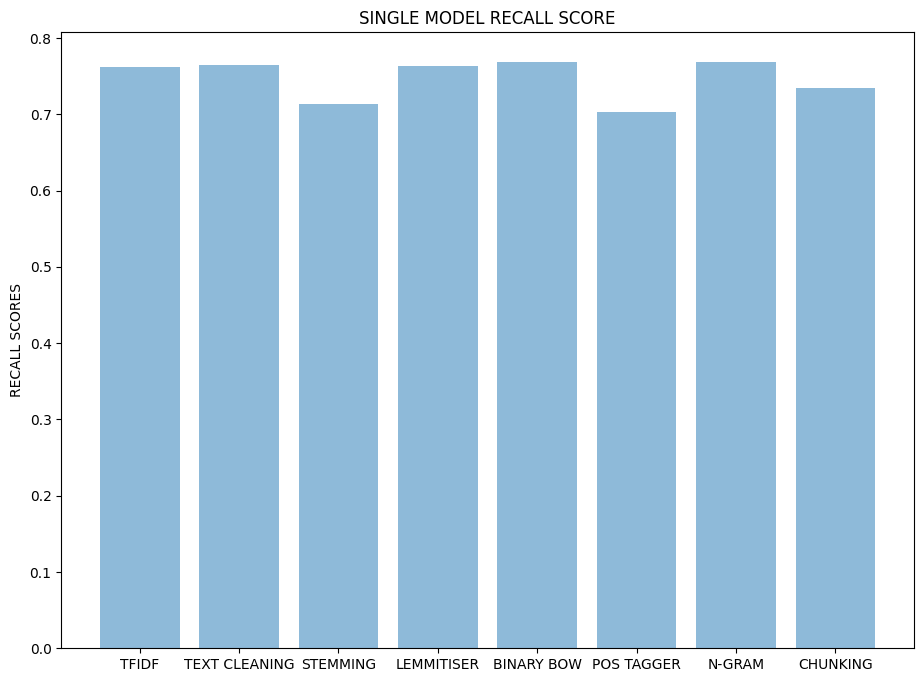

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('TFIDF', 'TEXT CLEANING', 'STEMMING', 
           'LEMMITISER', 'BINARY BOW', 'POS TAGGER', 'N-GRAM', 'CHUNKING')
y_pos = np.arange(len(objects))
performance = [tfidf_f1[1], clean_f1[1], stemmer_f1[1], lemm_f1[1], binary_f1[1], pos_f1[1], ngram_f1[1], chunk_f1[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RECALL SCORES')
plt.title('SINGLE MODEL RECALL SCORE')

fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('TFIDF', 'TEXT CLEANING', 'STEMMING', 
           'LEMMITISER', 'BINARY BOW', 'POS TAGGER', 'N-GRAM', 'CHUNKING')
y_pos = np.arange(len(objects))
performance = [tfidf_f1[2], clean_f1[2], stemmer_f1[2], lemm_f1[2], binary_f1[2], pos_f1[2], ngram_f1[2], chunk_f1[2]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 SCORES')
plt.title('SINGLE MODEL F1 SCORE')

fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()

In [27]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['MODEL', 'PRECISION SCORE', 'RECALL SCORE', 'F1 SCORE']),
                 cells=dict(values=[['TFIDF', 'TEXT CLEANING', 'STEMMING', 'LEMMITISER', 'BINARY BOW', 
                                     'POS TAGGER', 'N-GRAM', 'CHUNKING'], 
                                    [tfidf_f1[0], clean_f1[0], stemmer_f1[0], lemm_f1[0], binary_f1[0], pos_f1[0], ngram_f1[0], chunk_f1[0]],
                                    [tfidf_f1[1], clean_f1[1], stemmer_f1[1], lemm_f1[1], binary_f1[1], pos_f1[1], ngram_f1[1], chunk_f1[1]],
                                    [tfidf_f1[2], clean_f1[2], stemmer_f1[2], lemm_f1[2], binary_f1[2], pos_f1[2], ngram_f1[2], chunk_f1[2]]]))
                     ])
fig.show()

## Data Augmentation

https://towardsdatascience.com/data-augmentation-library-for-text-9661736b13ff

## Back translation

In [38]:
from BackTranslation import BackTranslation

def back_translation(text):
    trans = BackTranslation(url=[
          'translate.google.com',
          'translate.google.co.kr',
        ])
    result = trans.translate(text, src='en', tmp = 'zh-cn')
    
    return result.result_text

## nlpaug

In [39]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

def nlpaug(text):

    aug = nac.KeyboardAug()
    augmented_text = aug.augment(text)
    #print("Original:")
    #print(text)
    #print("Augmented Text:")
    #print(augmented_text)
    
    return augmented_text

# Back translation implemented

# !!! WARNING: TAKES A LONG TIME TO RUN !!!

In [41]:
#model 1 bag-of-word tf-idf
def model_back_translation(train_x, train_y, test_x):
    
    
    storage = []
    
    #iterate through column operating on row by row
    for x in train_x:
        
        x = back_translation(x)
        
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        #adding this to the storage list
        storage += [temp]
    
    #print(storage[0:10])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
back_mean, back_f1 = model_back_translation(train_x, train_y, test_x)

print('Mean: ', tfidf_mean, '\nF1:', tfidf_f1)

KeyboardInterrupt: 

# nlpaug implemented

In [40]:
#model 1 bag-of-word tf-idf
def model_nlpaug(train_x, train_y, test_x):
    
    
    storage = []
    
    #iterate through column operating on row by row
    for x in train_x:
        
        x = nlpaug(x)
                
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        #adding this to the storage list
        storage += [temp]
    
    #print(storage[0:10])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
nlp_mean, nlp_f1 = model_nlpaug(train_x, train_y, test_x)

print('Mean: ', nlp_mean, '\nF1:', nlp_f1)

Predicted  negative  neutral  positive
Actual                                
negative        215       84        49
neutral          29        7         7
positive         26       10         8 


Mean:  0.7427184466019418 
F1: (0.7491979913024486, 0.7427184466019418, 0.7020893744480351, None)


## Logistic Regression

In [48]:
#model 1 bag-of-word tf-idf
def model_one(train_x, train_y, test_x):
    
    
    storage = []
    
    #iterate through column operating on row by row
    for x in train_x:
                
        #step 1, text normalisation
        #removing stop words, this tokenises as well
        temp = stopwords_removed(x)
        
        #adding this to the storage list
        storage += [temp]
    
    #print(storage[0:10])
    
    #step 2, bag of words
    train_x_vector, test_x_vectors = TFIDF_bag_of_words(storage, test_x)
    
    
    #print(text_data[3])
    #print(train_x_vector[3].toarray())

    #classification and evaluation
    mean, f1 = logistic_regression(train_x_vector, train_y, test_x_vectors)
    
    return mean, f1
    
logistic_mean, logistic_f1 = model_one(train_x, train_y, test_x)

print('Mean: ', tfidf_mean, '\nF1:', tfidf_f1)

Predicted  negative  neutral  positive
Actual                                
negative        205       81        50
neutral          41       11         8
positive         24        9         6 


Mean:  -3831.540282947774 
F1: (0.7617188491918143, 0.7621359223300971, 0.7349365100854048, None)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [52]:
storage = []

#iterate through column operating on row by row
for x in text_train:

    x = nlpaug(x)

    #step 1, text normalisation
    #removing stop words, this tokenises as well
    temp = stopwords_removed(x)

    #adding this to the storage list
    storage += [temp]

#print(storage[0:10])

#step 2, bag of words
vectoriser = CountVectorizer()
final_x_vectors = vectoriser.fit_transform(storage)


#print(text_data[3])
#print(train_x_vector[3].toarray())

clf_log = LogisticRegression()


#train vector
clf_log.fit(train_x_vectors[0:1463, 0:9716], train_y[0:1463])


#preidct using data
train = clf_log.predict(final_x_vectors[0:1463, 0:9716])

print(tester["airline_sentiment"])
print(train)

column = tester["airline_sentiment"][1:1464]

tester["airline_sentiment"][1:1464] = train

print('sweet', tester)

tester.to_csv('data/test.csv')


0       positive
1        neutral
2        neutral
3       negative
4       negative
          ...   
1459    positive
1460    negative
1461     neutral
1462     neutral
1463    positive
Name: airline_sentiment, Length: 1464, dtype: object
['negative' 'neutral' 'neutral' ... 'negative' 'negative' 'neutral']
sweet       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0              0             0               0                 0   
1              1             1               1                 1   
2              2             2               2                 2   
3              3             3               3                 3   
4              4             4               4                 4   
...          ...           ...             ...               ...   
1459        1459          1459            1459              1459   
1460        1460          1460            1460              1460   
1461        1461          1461            1461              1461   
1462 

<ipython-input-52-1cc93fca0af6>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
storage = []

#iterate through column operating on row by row
for x in text_train:

    x = nlpaug(x)

    #step 1, text normalisation
    #removing stop words, this tokenises as well
    temp = stopwords_removed(x)

    #adding this to the storage list
    storage += [temp]

#print(storage[0:10])

#step 2, bag of words
vectoriser = CountVectorizer()
final_x_vectors = vectoriser.fit_transform(storage)


#print(text_data[3])
#print(train_x_vector[3].toarray())

clf_log = LogisticRegression()


#train vector
clf_log.fit(train_x_vectors[0:1463, 0:9716], train_y[0:1463])


#preidct using data
train = clf_log.predict(final_x_vectors[0:1463, 0:9716])

print(tester["airline_sentiment"])
print(train)

column = tester["airline_sentiment"][1:1464]

tester["airline_sentiment"][1:1464] = train

print('sweet', tester)

tester.to_csv('data/test.csv')


0       positive
1        neutral
2        neutral
3       negative
4       negative
          ...   
1459    positive
1460    negative
1461     neutral
1462     neutral
1463    positive
Name: airline_sentiment, Length: 1464, dtype: object
['negative' 'neutral' 'neutral' ... 'negative' 'negative' 'neutral']
sweet       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0              0             0               0                 0   
1              1             1               1                 1   
2              2             2               2                 2   
3              3             3               3                 3   
4              4             4               4                 4   
...          ...           ...             ...               ...   
1459        1459          1459            1459              1459   
1460        1460          1460            1460              1460   
1461        1461          1461            1461              1461   
1462 

<ipython-input-52-1cc93fca0af6>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

